# Confidence intervals, figure layouts, and interactivity

::::{grid}

:::{grid-item-card}

**Lecture learning goals**
^^^

By the end of the lecture you will be able to:

1. Create and understand how to interpret confidence intervals and confidence bands.
2. Layout plots in panels of a figure grid.
3. Create selections within a plot in Altair
4. Link selections between plots to highlight and select data.

:::

:::{grid-item-card}

**Required activities**
^^^

After class:
- Review the lecture notes.
- [This 30 min video on confidence intervals and figure layouts](https://ubcca-my.sharepoint.com/:v:/g/personal/joel_ostblom_ubc_ca/ETB7u-N_rWdHrlaJtco2ylEB5itvg3nizfTVCGk8caxK1g?e=k3Cqsy) (it starts a bit abruptly).
- [Section 16 on visualizing uncertainty](https://clauswilke.com/dataviz/visualizing-uncertainty.html) (some of this will be repetition from 552).

:::
::::

**Lecture slides**

<html>
  <body>
    <iframe src="slides-lec7.pdf#zoom=80&&navpanes=0&statusbar=0&messages=0&pagemode=none" width="100%" height="475px" style="position: relative;z-index: 9999999;">
    </iframe>
  </body>
</html>

## Confidence intervals

### Py

To show the confidence interval of the points as a band,
we can use `mark_errorband`.
By default this mark show the standard deviation of the points,
but we can change the `extent` to use bootstrapping on the sample data
to construct the 95% confidence interval of the mean.

In [1]:
import altair as alt
import pandas as pd
from vega_datasets import data

# Simplify working with large datasets in Altair
alt.data_transformers.enable('vegafusion')

# Load the R cell magic
%load_ext rpy2.ipython

Error importing in API mode: ImportError("dlopen(/Users/andytai/miniforge3/envs/531/lib/python3.11/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <20FB70DB-7E84-3375-A520-E0350E06C060> /Users/andytai/miniforge3/envs/531/lib/python3.11/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")


Trying to import in ABI mode.


In [2]:
cars = data.cars()

points = alt.Chart(cars).mark_point(opacity=0.3).encode(
    alt.X('Year'),
    alt.Y('Horsepower'),
    alt.Color('Origin')
)
points

alt.Chart(...)

In [3]:
points.mark_errorband(extent='ci')

alt.Chart(...)

We can add in the mean line.

In [4]:
points.mark_errorband(extent='ci') + points.encode(y='mean(Horsepower)').mark_line()

alt.LayerChart(...)

We can use `mark_errorbar` to show the standard deviation or confidence interval around a single point.

In [5]:
alt.Chart(cars).mark_errorbar(extent='ci', rule=alt.LineConfig(size=2)).encode(
    x='Horsepower',
    y='Origin'
)

alt.Chart(...)

Also here,
it is helpful to include an indication of the mean.

In [6]:
err_bars = alt.Chart(cars).mark_errorbar(extent='ci', rule=alt.LineConfig(size=2)).encode(
    x='Horsepower',
    y='Origin'
)

err_bars + err_bars.mark_point(color='black').encode(x='mean(Horsepower)')

alt.LayerChart(...)

An particularly usful visualization 
is to combine the above with an indication of the distribution of the data,
e.g. as a faded violinplot in the background
or as faded marks for all observations.
This gives the reader a chance to study the raw data
in addition to seeing the mean and its certainty.

In [7]:
err_bars = alt.Chart(cars).mark_errorbar(extent='ci', rule=alt.LineConfig(size=2)).encode(
    x='Horsepower',
    y='Origin'
)

(err_bars.mark_tick(color='lightgrey')
 + err_bars
 + err_bars.mark_point(color='black').encode(x='mean(Horsepower)'))

alt.LayerChart(...)

### R

In ggplot, we can create confidence bands via `geom_ribbon`.
Previously we have passed specific statistic summary functions to the `fun` parameter,
but here we will use `fun.data` because we need both the lower and upper bond 
of where to plot the ribbon.
Whereas `fun` only allows functions that return a single value which decides where to draw the point on the y-axis
(such as `mean`),
`fun.data` allows functions to return three values (the min, middle, and max y-value).
The `mean_cl_boot` function is especially helpful here,
since it returns the upper and lower bound of the bootstrapped CI
(and also the mean value, but that is not used by `geom_ribbon`).

You need the `Hmisc` package installed in order to use `mean_cl_boot`,
if you don't nothing will show up but you wont get an error,
so it can be tricky to realize what is wrong.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 6 rows containing non-finite outside the scale range
(`stat_summary()`). 
  


R callback write-console: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


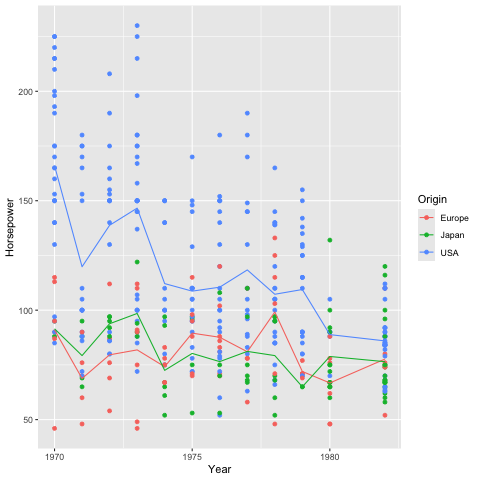

In [8]:
%%R -i cars

library(tidyverse)

ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin) +
    geom_point() +
    geom_line(stat = 'summary', fun = 'mean')

R callback write-console: In addition:   


R callback write-console: Warning message:
  


R callback write-console: Removed 6 rows containing non-finite outside the scale range
(`stat_summary()`). 
  


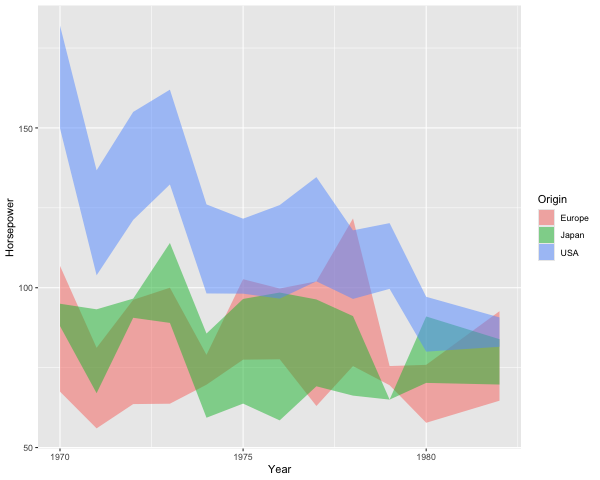

In [9]:
%%R -w 600
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin,
        fill = Origin) +
    geom_ribbon(stat = 'summary', fun.data = mean_cl_boot, alpha=0.5, color = NA)
    # `color = NA` removes the ymin/ymax lines and shows only the shaded filled area

We can add a line for the mean here as well.

R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 6 rows containing non-finite outside the scale range
(`stat_summary()`). 
  


R callback write-console: 2: Removed 6 rows containing non-finite outside the scale range
(`stat_summary()`). 
  


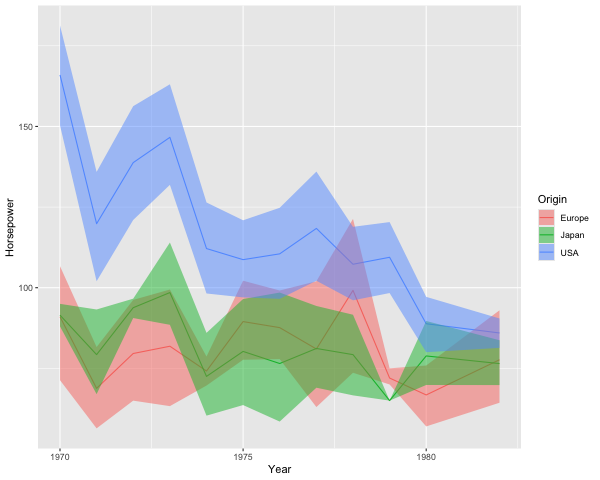

In [10]:
%%R -w 600
ggplot(cars) +
    aes(x = Year,
        y = Horsepower,
        color = Origin,
        fill = Origin) +
    geom_line(stat = 'summary', fun = mean) +
    geom_ribbon(stat = 'summary', fun.data = mean_cl_boot, alpha=0.5, color = NA)

To plot the confidence interval around a single point,
we can use `geom_pointrange`,
which also plots the mean
(so it uses all three values return from `mean_cl_boot`).

R callback write-console: In addition:   


R callback write-console: Warning message:
  


R callback write-console: Removed 6 rows containing non-finite outside the scale range
(`stat_summary()`). 
  


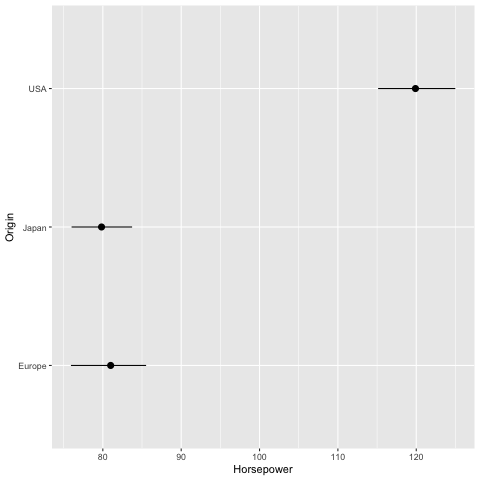

In [11]:
%%R
ggplot(cars) +
    aes(x = Horsepower,
        y = Origin) +
    geom_pointrange(stat = 'summary', fun.data = mean_cl_boot)

And finally we can plot the observations in the backgound here.

R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 6 rows containing non-finite outside the scale range
(`stat_summary()`). 
  


R callback write-console: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


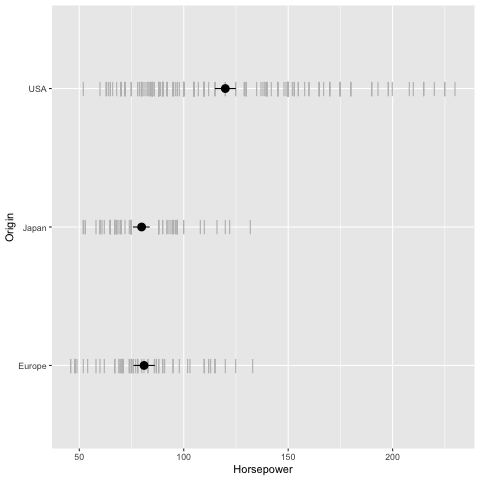

In [12]:
%%R
ggplot(cars) +
    aes(x = Horsepower,
        y = Origin) +
    geom_point(shape = '|', color='grey', size=5) +
    geom_pointrange(stat = 'summary', fun.data = mean_cl_boot, size = 0.7)

R callback write-console: In addition:   


R callback write-console: Warning messages:
  


R callback write-console: 1: Removed 6 rows containing non-finite outside the scale range
(`stat_ydensity()`). 
  


R callback write-console: 2: Removed 6 rows containing non-finite outside the scale range
(`stat_summary()`). 
  


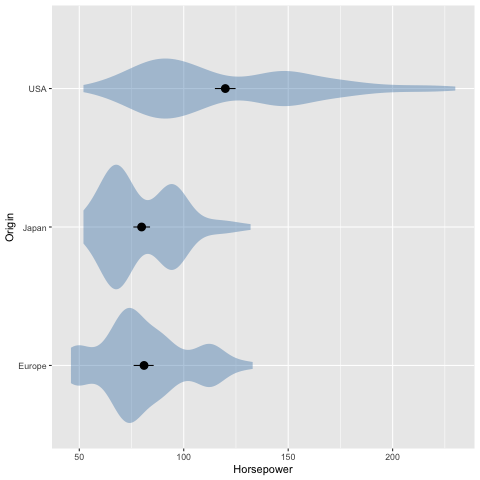

In [13]:
%%R
ggplot(cars) +
    aes(x = Horsepower,
        y = Origin) +
    geom_violin(color = NA, fill = 'steelblue', alpha = 0.4) +
    geom_pointrange(stat = 'summary', fun.data = mean_cl_boot, size = 0.7)

## Figure composition

### Py

Let's create two figures to layout together.
The titles here are a bit redundant,
they're just mean to facilitate spotting which figure goes where 
in the multi-panel figure.

In [14]:
import altair as alt
from vega_datasets import data

cars = data.cars()

In [15]:
mpg_weight = alt.Chart(cars, title='x = mpg').mark_point().encode(
    x=alt.X('Miles_per_Gallon'),
    y=alt.Y('Weight_in_lbs'),
    color='Origin'
)
mpg_weight

alt.Chart(...)

If a variable is shared between two figures,
it is a good idea to have it on the same axis.
This makes it easier to compare the relationship
with the previous plot.

In [16]:
hp_weight = alt.Chart(cars, title='x = hp').mark_point().encode(
    x=alt.X('Horsepower'),
    y=alt.Y('Weight_in_lbs'),
    color='Origin'
)
hp_weight

alt.Chart(...)

To concatenate plots vertically,
we can use the ampersand operator.

In [17]:
mpg_weight & hp_weight

alt.VConcatChart(...)

To concatenate horizontally,
we use the pipe operator.

In [18]:
mpg_weight | hp_weight

alt.HConcatChart(...)

To add an overall title to the figure,
we can use the `properties` method.
We need to surround the plots with a parentheis
to show that we are using `properties` of the composed figures
rather than just `hp_weight` one.

In [19]:
(mpg_weight | hp_weight).properties(title='Overall title')

alt.HConcatChart(...)

In addition to `&` and `|`,
we could use the functions `vconcat` and `hconcat`.
You can use what you find the most convenient,
this is how to add a title with one of those functions.

In [20]:
alt.hconcat(mpg_weight, hp_weight, title='Overall title')

alt.HConcatChart(...)

We can also build up a figure with varying sizes 
for the different panels,
e.g. adding marginal distribution plots to a scatter plot.

In [21]:
mpg_hist = alt.Chart(cars).mark_bar().encode(
    alt.X('Miles_per_Gallon').bin(),
    y='count()'
).properties(
    height=100
)
mpg_hist

alt.Chart(...)

In [22]:
weight_ticks = alt.Chart(cars).mark_tick().encode( 
    x='Origin',
    y='Weight_in_lbs',
    color='Origin'
)
weight_ticks

alt.Chart(...)

In [23]:
mpg_weight | weight_ticks

alt.HConcatChart(...)

Just adding operations after each other can lead to the wrong grouping of the panels in the figure.

In [24]:
mpg_hist & mpg_weight | weight_ticks

alt.HConcatChart(...)

Adding parenthesis can indicate how to group the different panels.

In [25]:
mpg_hist & (mpg_weight | weight_ticks)

alt.VConcatChart(...)

### R

In [26]:
%%R
library(tidyverse)

R callback write-console: In addition:   


R callback write-console: Warning message:
  


R callback write-console: Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


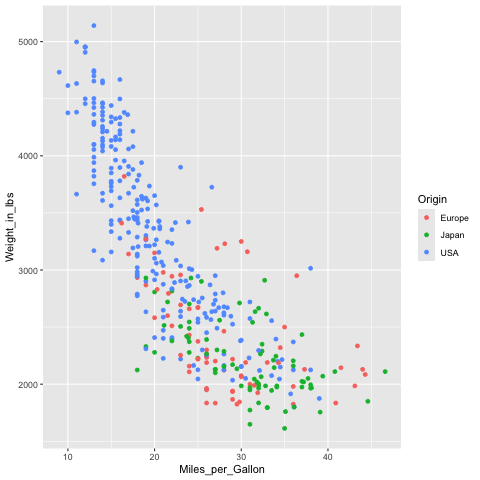

In [27]:
%%R -i cars
mpg_weight <- ggplot(cars) +
    aes(x = Miles_per_Gallon,
        y = Weight_in_lbs,
        color = Origin) +
    geom_point()
mpg_weight

R callback write-console: In addition:   


R callback write-console: Warning message:
  


R callback write-console: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


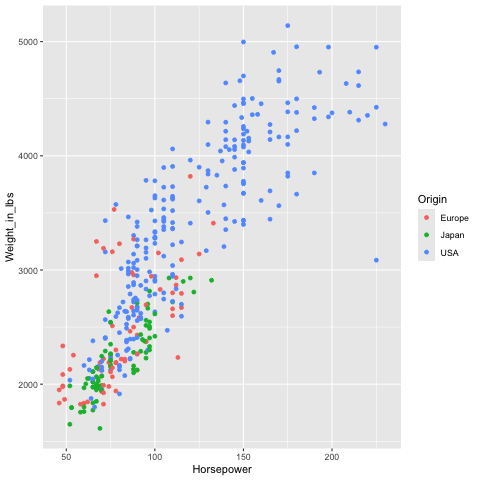

In [28]:
%%R -i cars
hp_weight <- ggplot(cars) +
    aes(x = Horsepower,
        y = Weight_in_lbs,
        color = Origin) +
    geom_point()
hp_weight

Laying out figures is not built into ggplot,
but the functionality is added in separate packages.
`patchwork` is similar to the operator-syntax we used with Altair,
and `cowplot` works similar to the concatenation functions in Altair.
Here I will be showing the latter,
but you're free to use either
("cow" are the author's initials,
Claus O Wilke, the same person who wrote Fundamentals of Data Visualization).


Attaching package: ‘cowplot’

The following object is masked from ‘package:lubridate’:

    stamp

In addition: Warning messages:
1: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
2: Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`). 


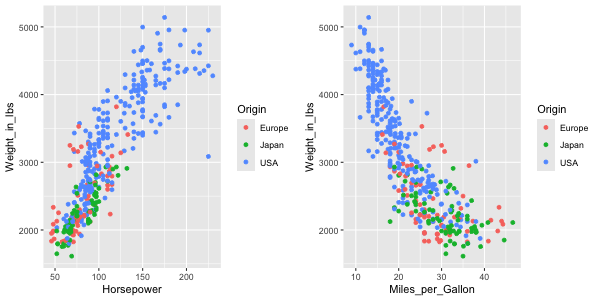

In [29]:
%%R -w 600 -h 300
library(cowplot)

plot_grid(hp_weight, mpg_weight)

Panels can easily be labeled.

In addition: Warning messages:
1: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
2: Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`). 


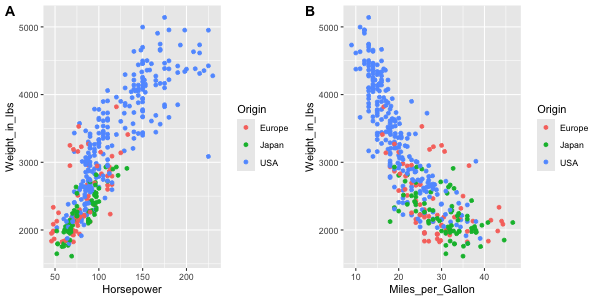

In [30]:
%%R -w 600 -h 300
plot_grid(hp_weight, mpg_weight, labels=c('A', 'B'))

And this can even be automated.

In addition: Warning messages:
1: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 
2: Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`). 


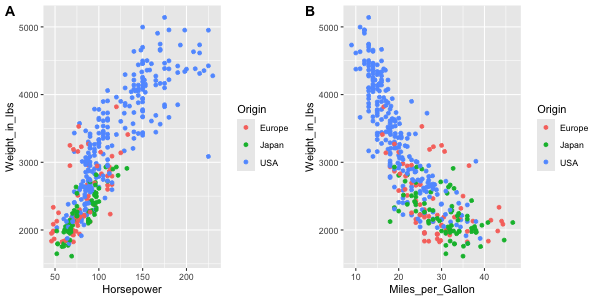

In [31]:
%%R -w 600 -h 300
plot_grid(hp_weight, mpg_weight, labels='AUTO')

Let's create a composite figure with marginal distribution plots.

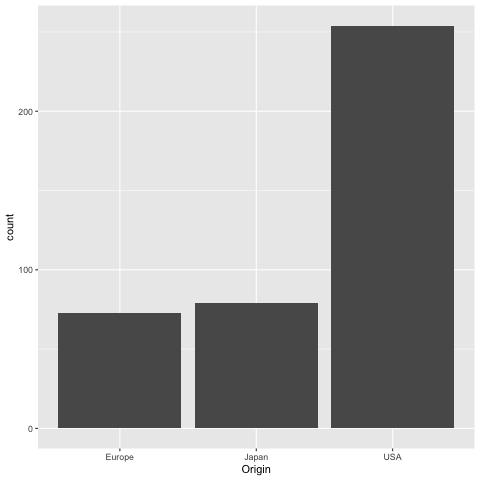

In [32]:
%%R
ggplot(cars) +
    aes(x = Origin) +
    geom_bar()

If we were to present this barplot as a communication firgure,
the bars should not be that wide.
It is more visually appealing with narrower bars.

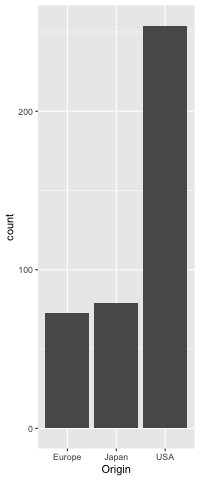

In [33]:
%%R -w 200
ggplot(cars) +
    aes(x = Origin) +
    geom_bar()

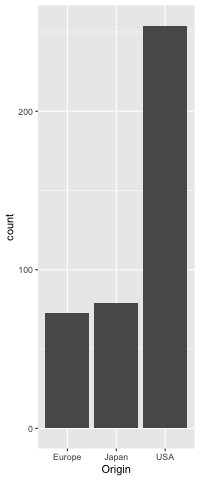

In [34]:
%%R -w 200
origin_count <- ggplot(cars) +
    aes(x = Origin) +
    geom_bar()
origin_count

To set the widths of figures in the composition plot,
we can use `rel_widths`.

In addition: Warning message:
Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`). 


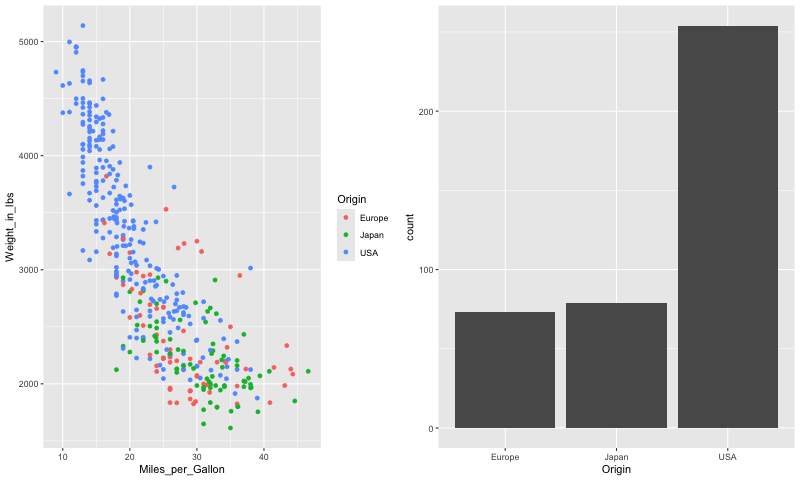

In [35]:
%%R -w 800
plot_grid(mpg_weight, origin_count)

In addition: Warning message:
Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`). 


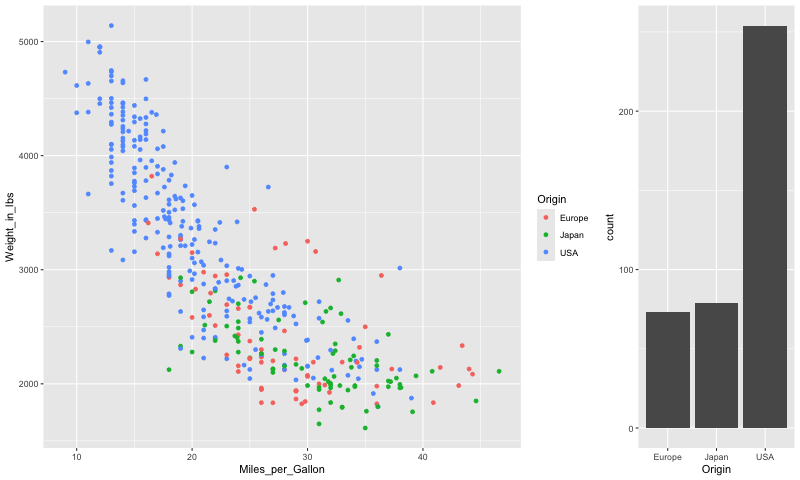

In [36]:
%%R -w 800
plot_grid(mpg_weight, origin_count, rel_widths=c(3, 1))

It is not that nice to see the legend between the plots,
so lets reorder them.

In addition: Warning message:
Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`). 


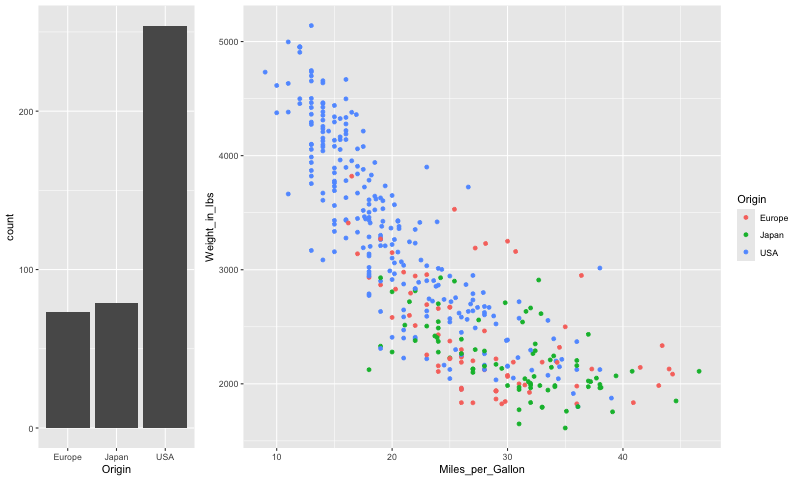

In [37]:
%%R -w 800
plot_grid(origin_count, mpg_weight, rel_widths=c(1, 3))

To concatenate vertically, 
we set the number of columns to 1.

In addition: Warning message:
Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`). 


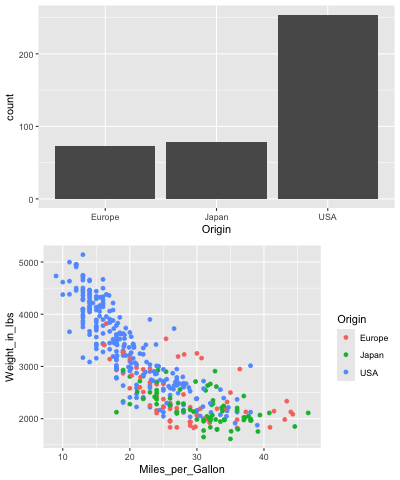

In [38]:
%%R -w 400
plot_grid(origin_count, mpg_weight, ncol=1)

Finally,
we can nest plot grids within each other.

In addition: Warning message:
Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`). 


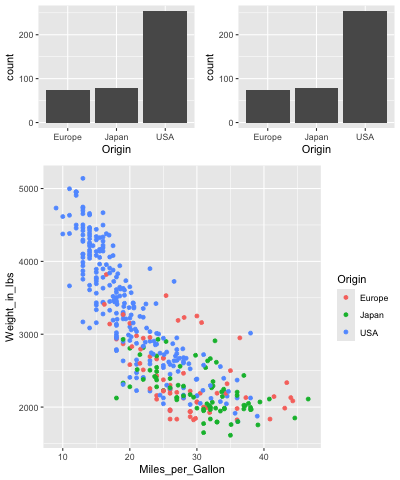

In [39]:
%%R -w 400
top_row <- plot_grid(origin_count, origin_count)
plot_grid(top_row, mpg_weight, ncol=1, rel_heights=c(1,2))

There are [some more tricks in the readme]( https://wilkelab.org/cowplot/articles/plot_grid.html),
including how to add a common title for the figures
via `ggdraw`.

## Interactivity between plots using Altair

One of the unique features of Altair
is that it does not only define a grammar of graphics,
but also a grammar of interactivity,
which makes it intuitive to add many of the plot-to-plot interactions.
This can be beneficial both for exploring data ourselves
and for letting others explore our figures in a richer context.
This interactivity is specified in the Altair/Vega-lite spec,
so when you export your plot to HTML files,
the interactivity is still there in the HTML and JS code,
even after you shut down your Python/JupyterLab.
This is called client side interactivity and is great for emailing someone an interactive chart.
In contrast,
buidling dashboards as we will learn about in viz 2
often requires an active Python server running
for interactivity to work.

### Tooltips

Hover over the points to see the information in a tooltip.

In [40]:
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    tooltip='Name'
)

alt.Chart(...)

Multiple fields can be included as a list to a tooltip.

In [41]:
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    tooltip=['Name', 'Origin']
)

alt.Chart(...)

### Panning and zooming

In [42]:
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    tooltip=['Name', 'Origin']
).interactive()

alt.Chart(...)

### Interval selections

Let's add a selection that lets us drag and drop with the mouse
to create an interval of selected points.
An interval selection is often called a "brush"
and connecting two plots is often referred to as "linked brushing".

In [43]:
brush = alt.selection_interval()
 
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon'
).add_params(
    brush
)

alt.Chart(...)

### Highlighting points with selections

It would be nice if the points were highlighted when selected.
Altair has a built in `if/else` function called `condition`
that checks if an event is present (such as selection) 
and then lets us define what to do if it is `True` and if it is `False`.

`alt.condition(check-this, if-true-do-this, if-false-do-this)`

In [44]:
brush = alt.selection_interval()
 
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_params(
    brush
)

alt.Chart(...)

We could change along which dimensions the selection is active.
By default is is both x and y for scatter plots.

In [45]:
brush = alt.selection_interval(encodings=['x'])
 
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_params(
    brush
)

alt.Chart(...)

### Linking selections across plots

Selections are automatically linked between plots.
This is great for comparing the same observations across multiple dimensions.

In [46]:
brush = alt.selection_interval()
 
points = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_params(
    brush
)

points | points.encode(y='Weight_in_lbs')

alt.HConcatChart(...)

There is only one interval selection above,
if I start dragging in another plot,
the first selection disappears.
I can modify this behavior
and change it so that each subplot gets its own selection
and that points within any section are highlighted within all plots
by setting `resolve='union'`.

In [47]:
brush = alt.selection_interval(resolve='union')  # The default is 'global'

points = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_params(
    brush
)

points | points.encode(y='Weight_in_lbs')

alt.HConcatChart(...)

I could modify this behavior so that only points that fall within
the intersection of *all* the selections are highlighted.

In [48]:
brush = alt.selection_interval(resolve='intersect')
 
points = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_params(
    brush
)

points | points.encode(y='Weight_in_lbs')

alt.HConcatChart(...)

### Click selections

In addition to interval/drag interactivity,
there is also interactivity via clicking.
Let's add add a bar chart that changes the opacity of bars
when not clicked.
You can hold shift to select multiple.

In [49]:
brush = alt.selection_interval()
click = alt.selection_point(fields=['Origin'])
 
points = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_params(
    brush
)

bars = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin',
    opacity=alt.condition(click, alt.value(0.9), alt.value(0.2))
).add_params(
    click
)

points & bars

alt.VConcatChart(...)

We can change the interaction that controls the clicks by setting `on='mouseover'`.
Now the bars are selected while just hovering,
no clicking needed.

In [50]:
brush = alt.selection_interval()
click = alt.selection_point(on='mouseover', fields=['Origin'])
 
points = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_params(
    brush
)

bars = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin',
    opacity=alt.condition(click, alt.value(0.9), alt.value(0.2))
).add_params(
    click
)

points & bars

alt.VConcatChart(...)

### Linking selection on charts with different encodings

It would be cool if selection in one chart
was reflected in the other one...
Let's link the charts together!
For the bar chart selector,
we need to specify which field/column
we should be selecting on since the x and y axis are not the same
between the two plots so Altair can't link them automatically
like the two scatters with the same axes.

In [51]:
brush = alt.selection_interval()
click = alt.selection_point(fields=['Origin'])
# `encodings` could also be used like this
# click = alt.selection_multi(encodings=['y'])

points = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray')),
    opacity=alt.condition(click, alt.value(0.9), alt.value(0.2))
).add_params(
    brush
)

bars = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin',
    opacity=alt.condition(click, alt.value(0.9), alt.value(0.2))
).add_params(
    click
)

points & bars

alt.VConcatChart(...)

### Legend selections

It is often nice to include legend interactivity in scatter plots.
For this we could use the same technique as above
and specify that we want to bind it to the legend.
We also need to add the selection to the combined chart
instead of to the bar chart
since the legend belongs to both of them.

In [52]:
brush = alt.selection_interval()
click = alt.selection_point(fields=['Origin'], bind='legend')
 
points = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray')),
    opacity=alt.condition(click, alt.value(0.9), alt.value(0.2))
).add_params(
    brush
)

bars = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin',
    opacity=alt.condition(click, alt.value(0.9), alt.value(0.2))
)

(points & bars).add_params(click)

alt.VConcatChart(...)

### Filtering data based on a selection

Another useful type of interactivity is to actually filter the data
based on a selection,
rather than just styling the graphical elements differently as we have done so far.
We can do this by adding `transform_filter(brush)` to out bar plot.
We mention `transform_filter` briefly in 531,
they can perform similar filter operations as pandas,
but are not as powerful in general
so they are best used for operations like this where we can't use pandas.
This type of interaction is sometimes called a dynamic query.

In [53]:
brush = alt.selection_interval()
click = alt.selection_point(fields=['Origin'], bind='legend')
 
points = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray')),
    opacity=alt.condition(click, alt.value(0.9), alt.value(0.2))
).add_params(
    brush
)

bars = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin',
    opacity=alt.condition(click, alt.value(0.9), alt.value(0.2))
).transform_filter(
    brush
)

(points & bars).add_params(click)

alt.VConcatChart(...)

### Binding selection to other chart attributes

We can also bind the selection to other attributes of our plot.
For example,
a selection could bound to the domain of the scale which sets the axis range.
This way one chart could be used as a minimap to navigate another chart.

In [54]:
source = data.sp500.url

base = alt.Chart(source, width=600).mark_area().encode(
    x = 'date:T',
    y = 'price:Q')

brush = alt.selection_interval(encodings=['x'])
lower = base.properties(height=60).add_params(brush)

upper = base.encode(alt.X('date:T').scale(domain=brush))

upper & lower

alt.VConcatChart(...)